# Cointegration Testing

_This setup code is required to run in an IPython notebook_

In [1]:
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn

seaborn.set_style('darkgrid')
plt.rc("figure", figsize=(16, 6))
plt.rc("savefig", dpi=90)
plt.rc("font",family="sans-serif")
plt.rc("font",size=14)

We will look at the spot prices of crude oil measured in Cushing, OK for
West Texas Intermediate Crude, and Brent Crude. The underlying data in this
data set come from the [U.S. Energy Information Administration](https://www.eia.gov/).

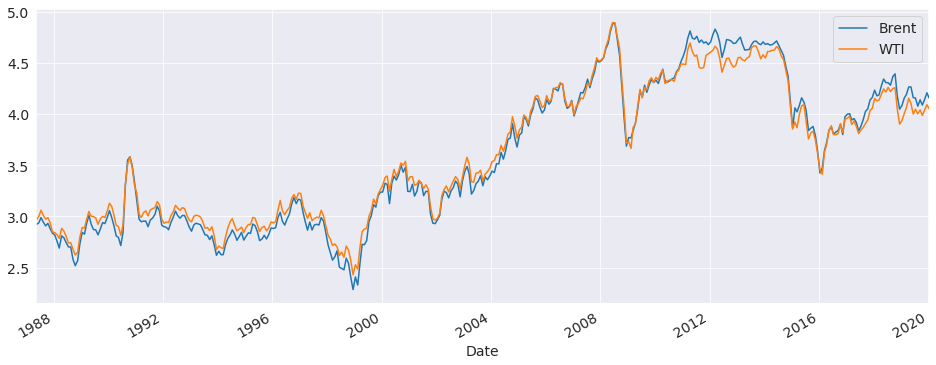

In [2]:
from arch.data import crude
import numpy as np
data = crude.load()
log_price = np.log(data)

ax = log_price.plot()
xl = ax.set_xlim(log_price.index.min(), log_price.index.max())

We can verify these both of these series appear to contains unit roots
using Augmented Dickey-Fuller tests. The p-values are large indicating
that the null cannot be rejected.

In [3]:
from arch.unitroot import ADF

ADF(log_price.WTI, trend="c")

<class 'arch.unitroot.unitroot.ADF'>
"""
   Augmented Dickey-Fuller Results   
=====================================
Test Statistic                 -1.780
P-value                         0.391
Lags                                1
-------------------------------------

Trend: Constant
Critical Values: -3.45 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
"""

In [4]:
ADF(log_price.Brent, trend="c")

<class 'arch.unitroot.unitroot.ADF'>
"""
   Augmented Dickey-Fuller Results   
=====================================
Test Statistic                 -1.655
P-value                         0.454
Lags                                1
-------------------------------------

Trend: Constant
Critical Values: -3.45 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
"""

The Engle-Granger test is a 2-step test that first estimates a cross-sectional
regression, and then tests the residuals from this regression using an
Augmented Dickey-Fuller distribution with modified critical values. The cross-sectional regression is

$$ Y_t = X_t \beta + D_t \gamma + \epsilon_t $$

where $Y_t$ and $X_t$ combine to contain the set of variables being tested for
cointegration and $D_t$ are a set of deterministic regressors that might include
a constant, a time trend, or a quadratic time trend. The trend is specified using
`trend` as

* `"n"`: No trend
* `"c"`: Constant
* `"ct"`: Constant and time trend
* `"ctt"`: Constant, time and quadratic trends

Here we assume that that cointegrating relationship is exact so that no
deterministics are needed.

In [5]:
from arch.unitroot import engle_granger

eg_test = engle_granger(log_price.WTI, log_price.Brent, trend="n")
eg_test

Engle-Granger Cointegration Test
Statistic: -3.467647199847728
P-value: 0.006860702109283989
Null: No Cointegration, Alternative: Cointegration
ADF Lag length: 0
Trend: c
Estimated Root ρ (γ+1): 0.9386946007157646
Distribution Order: 1
ID: 0x7fa5e91ddf90

The `plot` method can be used to plot the model residual.  We see that while this appears to be mean 0, it might have a trend in it.

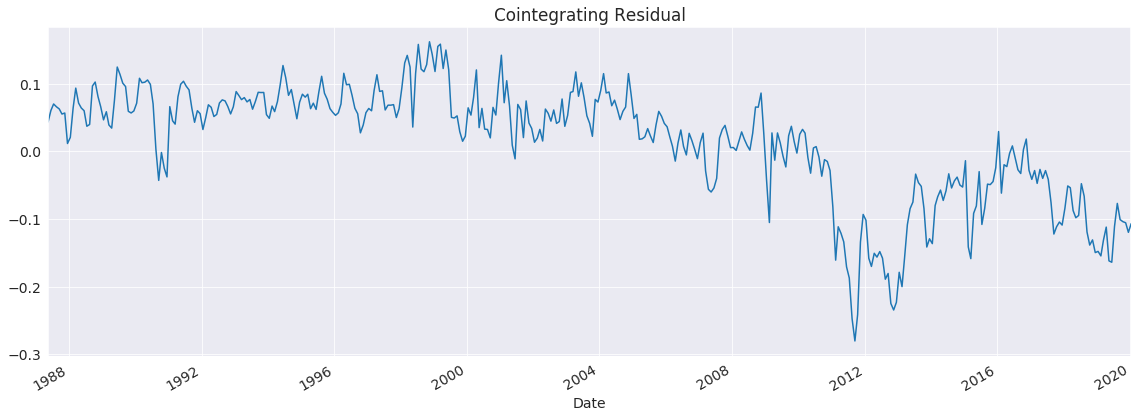

In [6]:
fig = eg_test.plot()

The estimated cointegrating vector is exposed through he `cointegrating_vector` property.  Here we see it is very close to $[1, -1]$, indicating a simple no-arbitrage relationship.

In [7]:
eg_test.cointegrating_vector

WTI      1.000000
Brent   -1.000621
dtype: float64

We can rerun the test with both a constant and a time trend to see how this affects the conclusion. We firmly reject the null of no cointegration even with this alternative assumption.

In [8]:
eg_test = engle_granger(log_price.WTI, log_price.Brent, trend="ct")
eg_test

Engle-Granger Cointegration Test
Statistic: -5.836649709141748
P-value: 2.3286206215069963e-05
Null: No Cointegration, Alternative: Cointegration
ADF Lag length: 0
Trend: c
Estimated Root ρ (γ+1): 0.840072999531547
Distribution Order: 1
ID: 0x7fa5e9078d10

In [9]:
eg_test.cointegrating_vector

WTI      1.000000
Brent   -0.931769
const   -0.296939
trend    0.000185
dtype: float64

The residuals are clearly mean zero but show evidence of a structural break around the financial crisis of 2008.

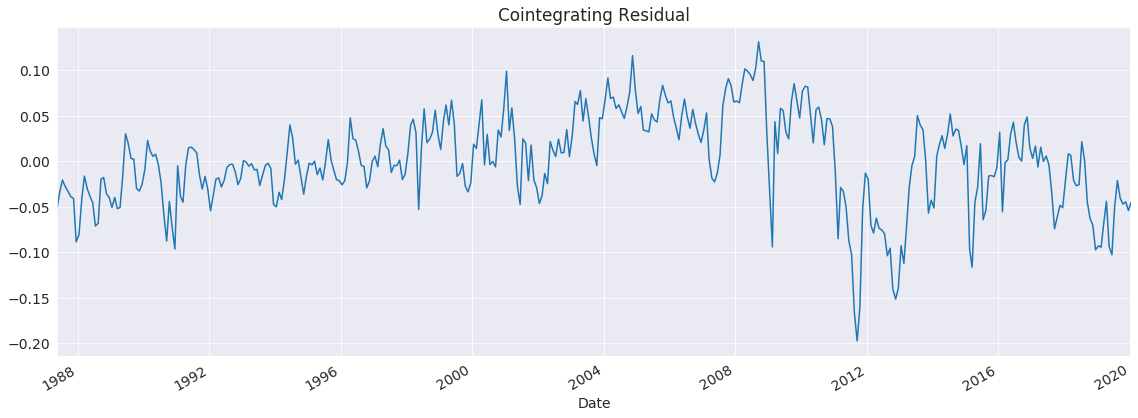

In [10]:
fig = eg_test.plot()

To investigate the changes in the 2008 financial crisis, we can re-run the test on only the pre-crisis period.

In [11]:
eg_test = engle_granger(log_price[:"2008"].WTI, log_price[:"2008"].Brent, trend="n")
eg_test

Engle-Granger Cointegration Test
Statistic: -4.962489476284803
P-value: 2.054007070920808e-05
Null: No Cointegration, Alternative: Cointegration
ADF Lag length: 0
Trend: c
Estimated Root ρ (γ+1): 0.8246009342909095
Distribution Order: 1
ID: 0x7fa5e8ff17d0

These residuals look quite a bit better although it is possible the break in teh cointegrating vector happened around 2005 when oil prices first surged.

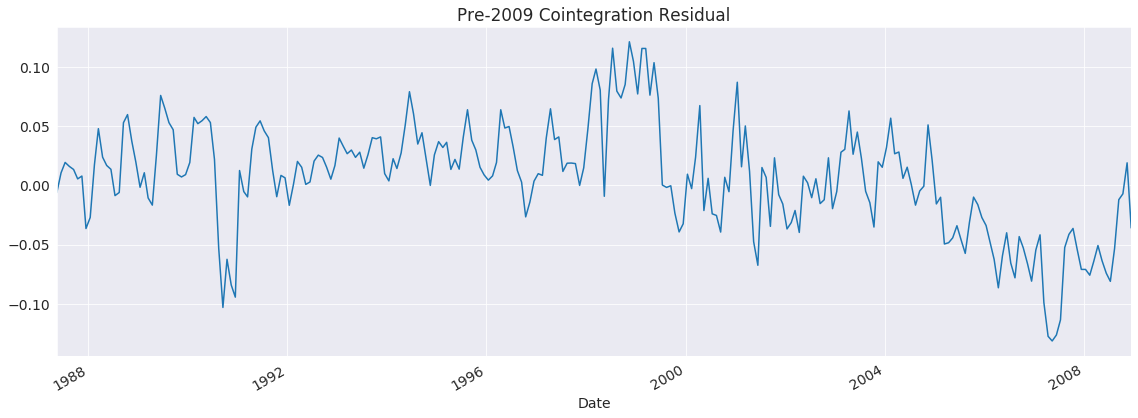

In [12]:
fig = eg_test.plot()
ax = fig.get_axes()[0]
title = ax.set_title("Pre-2009 Cointegration Residual")
ax
import matplotlib.pyplot as plt
